In [29]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import time



# ask the user to select a file

# Ask user to select a file
root = tk.Tk()
root.withdraw()
print("Select a CSV file to load into a Pandas DataFrame")

# Open file dialog box and allow user to select a file
file_path = filedialog.askopenfilename()


# Load selected file into Pandas DataFrame
df = pd.read_csv(file_path)

# only keep columns we need
df = df[['Expense Type','Employee','Employee ID','Report Name','Transaction Date','Claimed Amount','Vendor','Approved Amount (rpt)' ]]

# Convert the columns to formats we need
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Claimed Amount'] = pd.to_numeric(df['Claimed Amount'])
df['Approved Amount (rpt)'] = pd.to_numeric(df['Approved Amount (rpt)'])


# print total number of rows and columns
print("Total number of rows:", len(df))
print("Total number of columns:", len(df.columns))
#print a table of columns and data types
print(df.dtypes)

# Filter data for transactions over 1000 and sort by employee ID  
filtered_df = df[df['Approved Amount (rpt)'] > 1].sort_values(by=['Employee ID'])
#print number of rows 
#print("Number of rows after filtering:", len(filtered_df))

#sort by supplier name
filtered_df = filtered_df.sort_values(by=['Employee ID'])

#print the first 50 rows employee id, transaction date, approved amount, and vendor
print(filtered_df[['Employee ID','Transaction Date','Approved Amount (rpt)','Vendor']].head(50))

#choose the first 10000 rows
#filtered_df = filtered_df.head(10000)



Select a CSV file to load into a Pandas DataFrame
Total number of rows: 100000
Total number of columns: 8
Expense Type                     object
Employee                         object
Employee ID                       int64
Report Name                      object
Transaction Date         datetime64[ns]
Claimed Amount                    int64
Vendor                           object
Approved Amount (rpt)             int64
dtype: object
       Employee ID Transaction Date  Approved Amount (rpt)  \
96712         1000       2022-09-21                   6885   
39837         1000       2022-01-19                   4476   
1661          1000       2022-06-08                   8252   
91475         1000       2022-03-03                   8113   
75338         1000       2022-02-21                   7664   
7428          1000       2022-01-27                   6875   
94219         1000       2022-07-09                   8796   
7869          1000       2022-11-07                   4041   
25

Load file, convert payment date and total to data types
Check total rows and columns and datatypes

In [30]:
def within_1_percent(df):
    """
    Filter data within 1% of each other in the Payment Total column and within 5 days of each other.
    """
    if len(df) >= 2:
        mean_payment = df['Approved Amount (rpt)'].mean()
        upper_limit = mean_payment * 1.01
        lower_limit = mean_payment * 0.99
        max_date = df['Transaction Date'].max()
        min_date = df['Transaction Date'].min()
        if (max_date - min_date).days <= 5:
            return df[(df['Approved Amount (rpt)'] <= upper_limit) & (df['Approved Amount (rpt)'] >= lower_limit)]
        else:
            return pd.DataFrame()
    else:
        return pd.DataFrame()
        

# TEST 1-------------------Same employee, same vendor same total

# Filter data for transactions over 1000
#filtered_df = df[df['Approved Amount (rpt)']]

# Group by employee id and Vendor 
grouped_df = filtered_df.groupby(['Employee ID','Vendor','Approved Amount (rpt)'])

# Exclude results with less than two rows per vendor
grouped_df = grouped_df.filter(lambda x: len(x) >= 2)

# print total number of rows 
print("Total number of rows:", len(grouped_df))

# print the first 50 rows of the grouped data same vendor, within 1% and 5 days 
print("Test 1 - same employee, vendor and total")
print(grouped_df[['Employee ID','Transaction Date','Approved Amount (rpt)','Vendor']].head(50))


Total number of rows: 4
Test 1 - same employee, vendor and total
   Employee ID Transaction Date  Approved Amount (rpt)  \
1         3244       2022-12-07                   4345   
0         3244       2022-12-07                   4345   
4         4544       2022-07-21                   1133   
3         4544       2022-07-21                   1133   

                    Vendor  
1  Logan, Meyer and Clarke  
0  Logan, Meyer and Clarke  
4              Howe-Wright  
3              Howe-Wright  



TEST 1-------------------Same employee, same vendor, within 1% total and 5 days --

In [31]:
# Define a function to filter groups with less than 2 rows
def at_least_2_rows(df):
    return len(df) >= 2

# TEST 2-----------same employee, amount and date -----------------------------

# Group the data by employee and Approved amount, and Transaction date,  filter for groups with at least 2 rows and sort by employee id
grouped_df2 = filtered_df.groupby(['Employee ID', 'Approved Amount (rpt)', 'Transaction Date']).filter(at_least_2_rows).sort_values(by=['Employee ID'])



# Remove empty dataframes from the grouped data
grouped_df2 = grouped_df2[grouped_df2['Approved Amount (rpt)'].notna()]

# Print total number of rows
print("Total number of rows:", len(grouped_df2))

#print first 50 rows of the grouped data just employee, amount, date and report
print("Test 2 - same employee, amount, and date")
print(grouped_df2[['Employee ID',  'Approved Amount (rpt)', 'Transaction Date','Report Name']].head(50))



Total number of rows: 4
Test 2 - same employee, amount, and date
   Employee ID  Approved Amount (rpt) Transaction Date  \
1         3244                   4345       2022-12-07   
0         3244                   4345       2022-12-07   
4         4544                   1133       2022-07-21   
3         4544                   1133       2022-07-21   

                                      Report Name  
1                                           movie  
0                                            hulu  
4  Service short act reduce group what team wait.  
3  Service short act reduce group what team wait.  


 TEST 2-----------same employee, amount and date-----------------------------

Matches for Po Number and total

In [32]:
# TEST 3-----------same employee, SAME AMOUNT-----------------------------

# Group the data by employee and Approved amount filter for groups with at least 2 rows and sort by employee id
grouped_df3 = filtered_df.groupby(['Employee ID', 'Approved Amount (rpt)']).filter(at_least_2_rows).sort_values(by=['Employee ID'])


# Remove empty dataframes from the grouped data
grouped_df3 = grouped_df3[grouped_df3['Approved Amount (rpt)'].notna()]

# Print total number of rows
print("Total number of rows:", len(grouped_df3))

#print first 50 rows of the grouped data just employee id, amount, date and report name
print("First 50 rows of the grouped data same employee and amount")
print(grouped_df3[['Employee ID', 'Transaction Date', 'Report Name', 'Approved Amount (rpt)']].head(50))


Total number of rows: 98
First 50 rows of the grouped data same employee and amount
       Employee ID Transaction Date  \
36530         1378       2022-04-17   
32136         1378       2022-01-20   
44680         1556       2022-05-20   
49438         1556       2022-02-19   
60642         1623       2022-12-23   
48407         1623       2022-07-07   
98649         1723       2022-02-22   
56257         1723       2022-12-28   
35508         2181       2022-06-21   
96214         2181       2022-05-20   
55722         2237       2022-06-17   
24271         2237       2022-08-30   
48999         2257       2022-11-11   
14329         2257       2022-07-30   
38600         2988       2022-05-14   
97235         2988       2022-04-18   
42773         3168       2022-06-30   
45419         3168       2022-09-08   
1             3244       2022-12-07   
0             3244       2022-12-07   
25698         3290       2022-07-10   
95121         3290       2022-03-29   
57979         3296 

 TEST 3-----------same employee, SAME AMOUNT

In [33]:
# TEST 4-----------keyword test-----------------------------

# Group the data with keywords 'tv', 'movie', 'entertainment','gift','music' in any field
grouped_df4 = filtered_df[filtered_df['Report Name'].str.contains('tv|movie|entertainment|gift|music', case=False, na=False)].sort_values(by=['Employee ID'])


# Remove empty dataframes from the grouped data
grouped_df4 = grouped_df4[grouped_df4['Approved Amount (rpt)'].notna()]

# Print total number of rows
print("Total number of rows:", len(grouped_df4))

#print first 50 rows of the grouped data just employee id, amount, date and report name
print("First 50 rows of the grouped data same employee and amount")
print(grouped_df4[['Employee ID', 'Transaction Date', 'Report Name', 'Approved Amount (rpt)']].head(50))


Total number of rows: 1664
First 50 rows of the grouped data same employee and amount
       Employee ID Transaction Date  \
79522         1001       2022-10-11   
28650         1003       2022-06-22   
32214         1004       2022-12-25   
71459         1005       2022-12-28   
20966         1007       2022-02-18   
42835         1008       2022-03-07   
82136         1010       2022-08-17   
75008         1021       2022-06-02   
3334          1024       2022-04-27   
6279          1026       2022-11-19   
23606         1027       2022-04-11   
17527         1035       2022-04-21   
16177         1035       2022-07-17   
81173         1035       2022-09-08   
10337         1042       2022-04-15   
81071         1042       2022-11-27   
34002         1046       2022-03-05   
97789         1058       2022-11-13   
4179          1059       2022-02-22   
31740         1063       2022-03-27   
4461          1067       2022-11-05   
28600         1074       2022-12-16   
40113         108

<Axes: title={'center': 'Total Approved Amount by Employee ID'}, xlabel='Employee ID'>

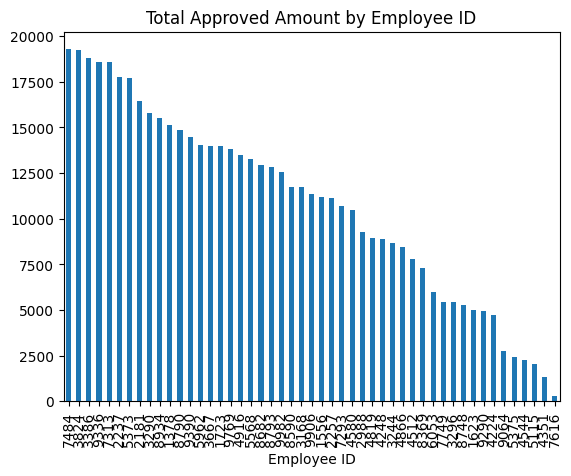

In [34]:
import matplotlib.pyplot as plt

#plot the data by employee id and approved amount sort by total approved amount with title
grouped_df3.groupby(['Employee ID'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Approved Amount by Employee ID')



<Axes: title={'center': 'Total Approved Amount by Vendor'}, xlabel='Vendor'>

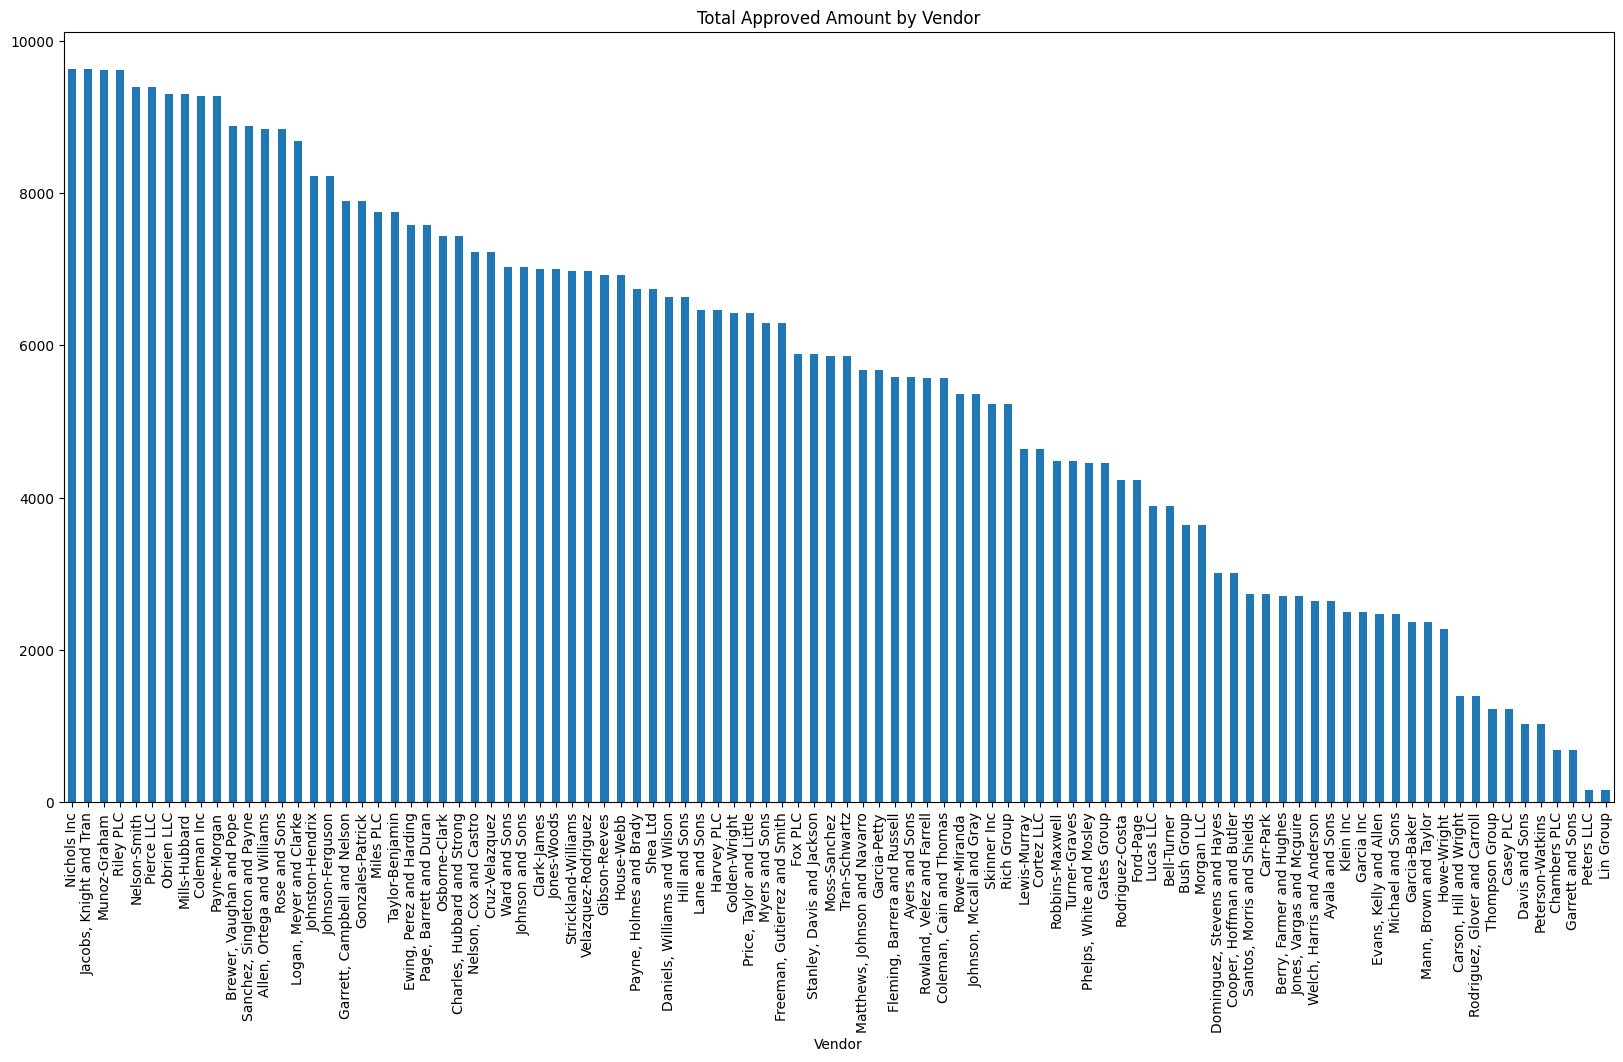

In [35]:
#plot the data by vendor and approved amount sort by total approved amount with title
grouped_df3.groupby(['Vendor'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Total Approved Amount by Vendor')

<Axes: title={'center': 'Total Approved Amount by Report Name'}, xlabel='Report Name'>

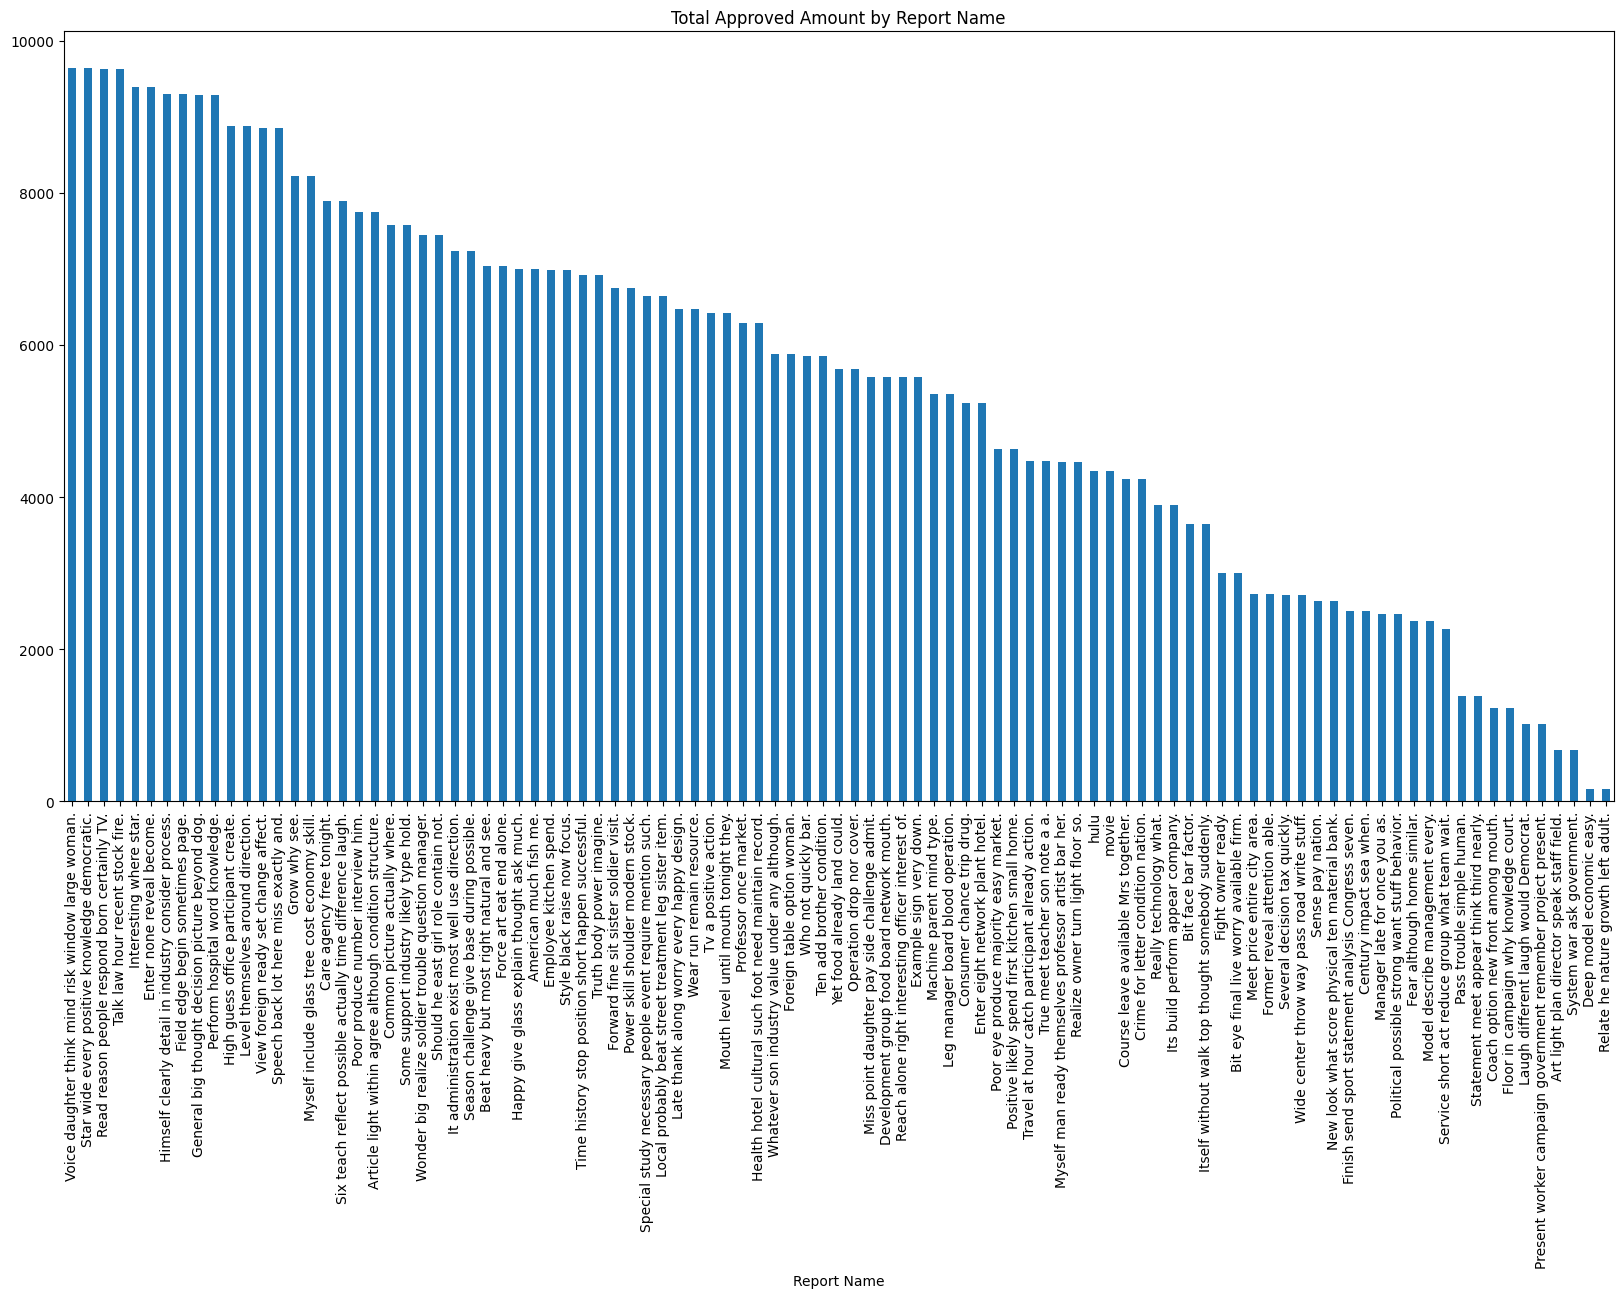

In [36]:
#plot the data by report name and approved amount sort by total approved amount with title
grouped_df3.groupby(['Report Name'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Total Approved Amount by Report Name')

<Axes: title={'center': 'Total Approved Amount by Expense Type'}, xlabel='Expense Type'>

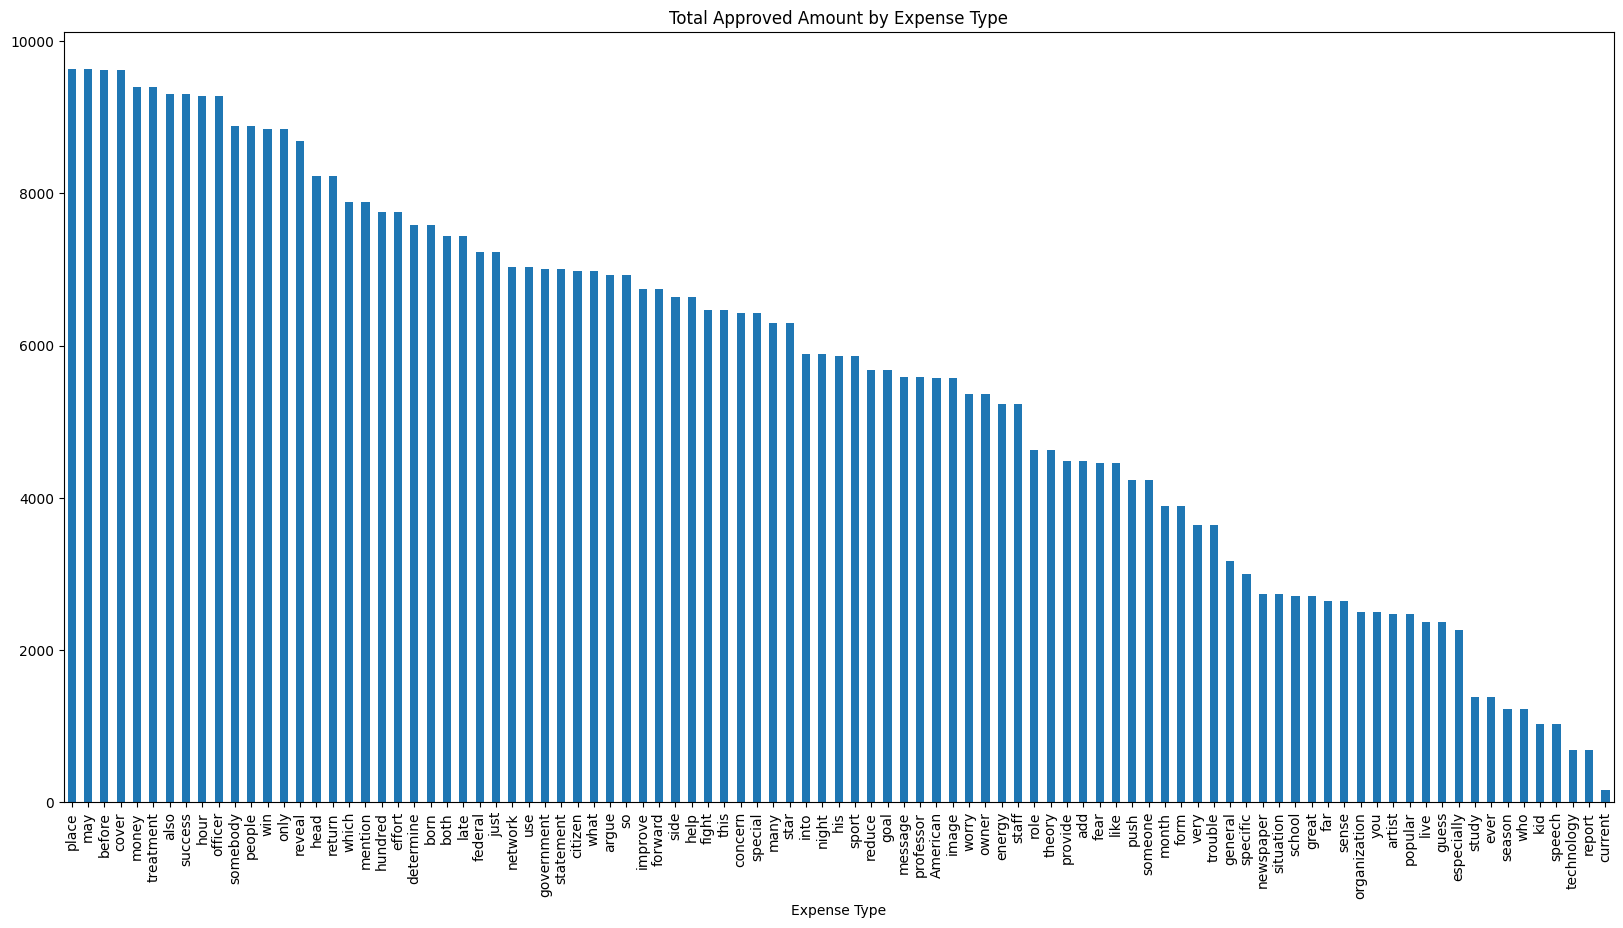

In [37]:
#plot the data by expense type and approved amount sort by total approved amount with title
grouped_df3.groupby(['Expense Type'])['Approved Amount (rpt)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Total Approved Amount by Expense Type')

<Axes: title={'center': 'Average Approved Amount by Employee ID'}, xlabel='Employee ID'>

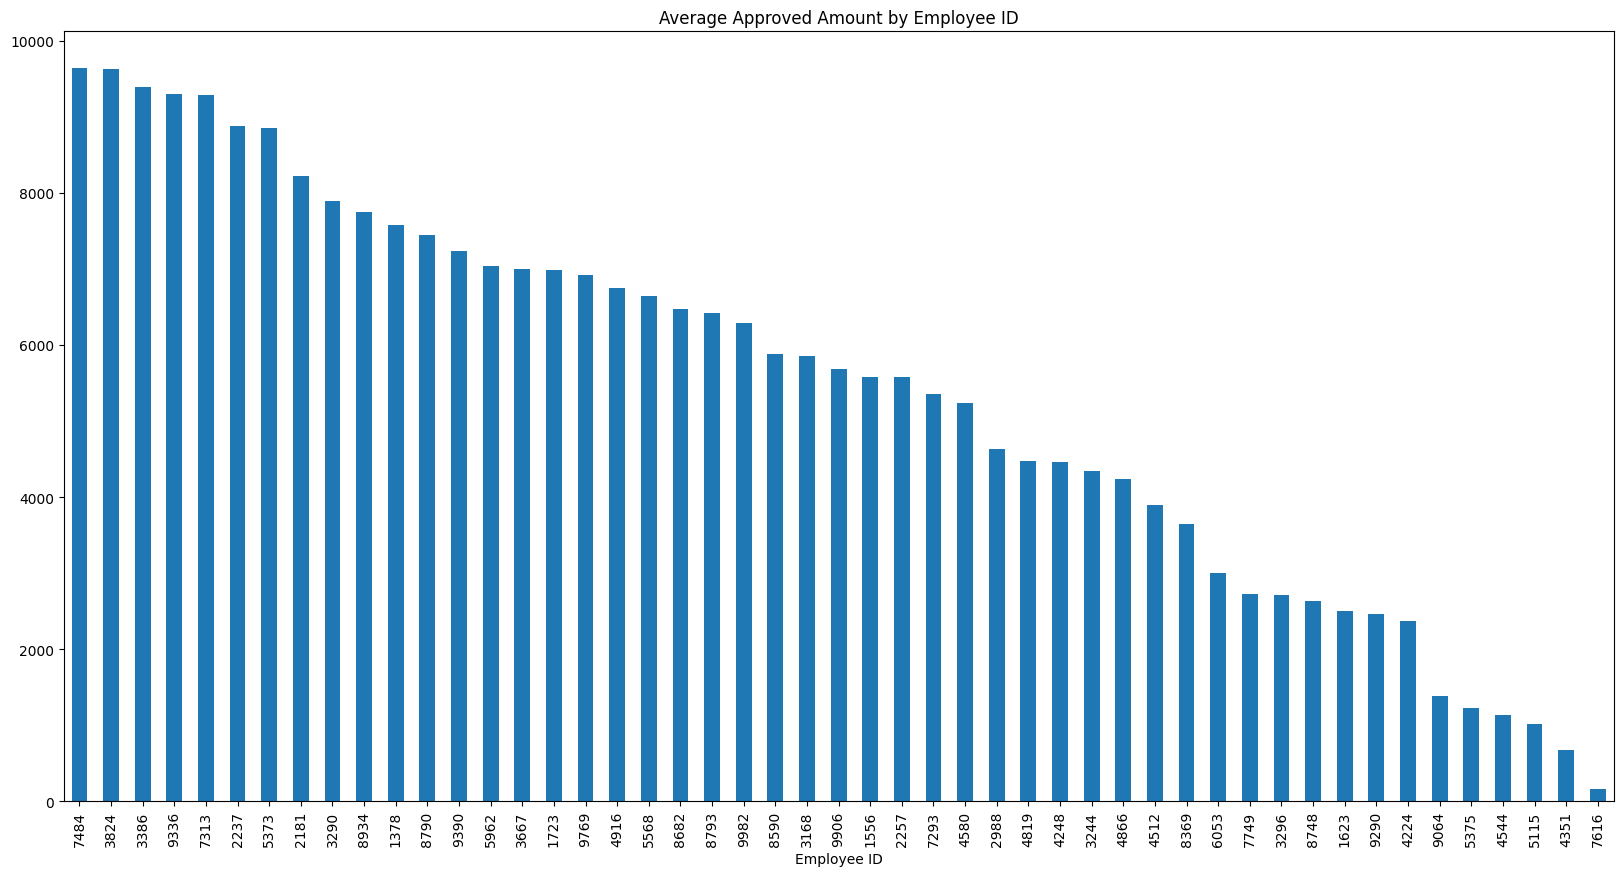

In [38]:
# plot the average approved amount by employee id with title
grouped_df3.groupby(['Employee ID'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Average Approved Amount by Employee ID')

<Axes: title={'center': 'Average Approved Amount by Report Name'}, xlabel='Report Name'>

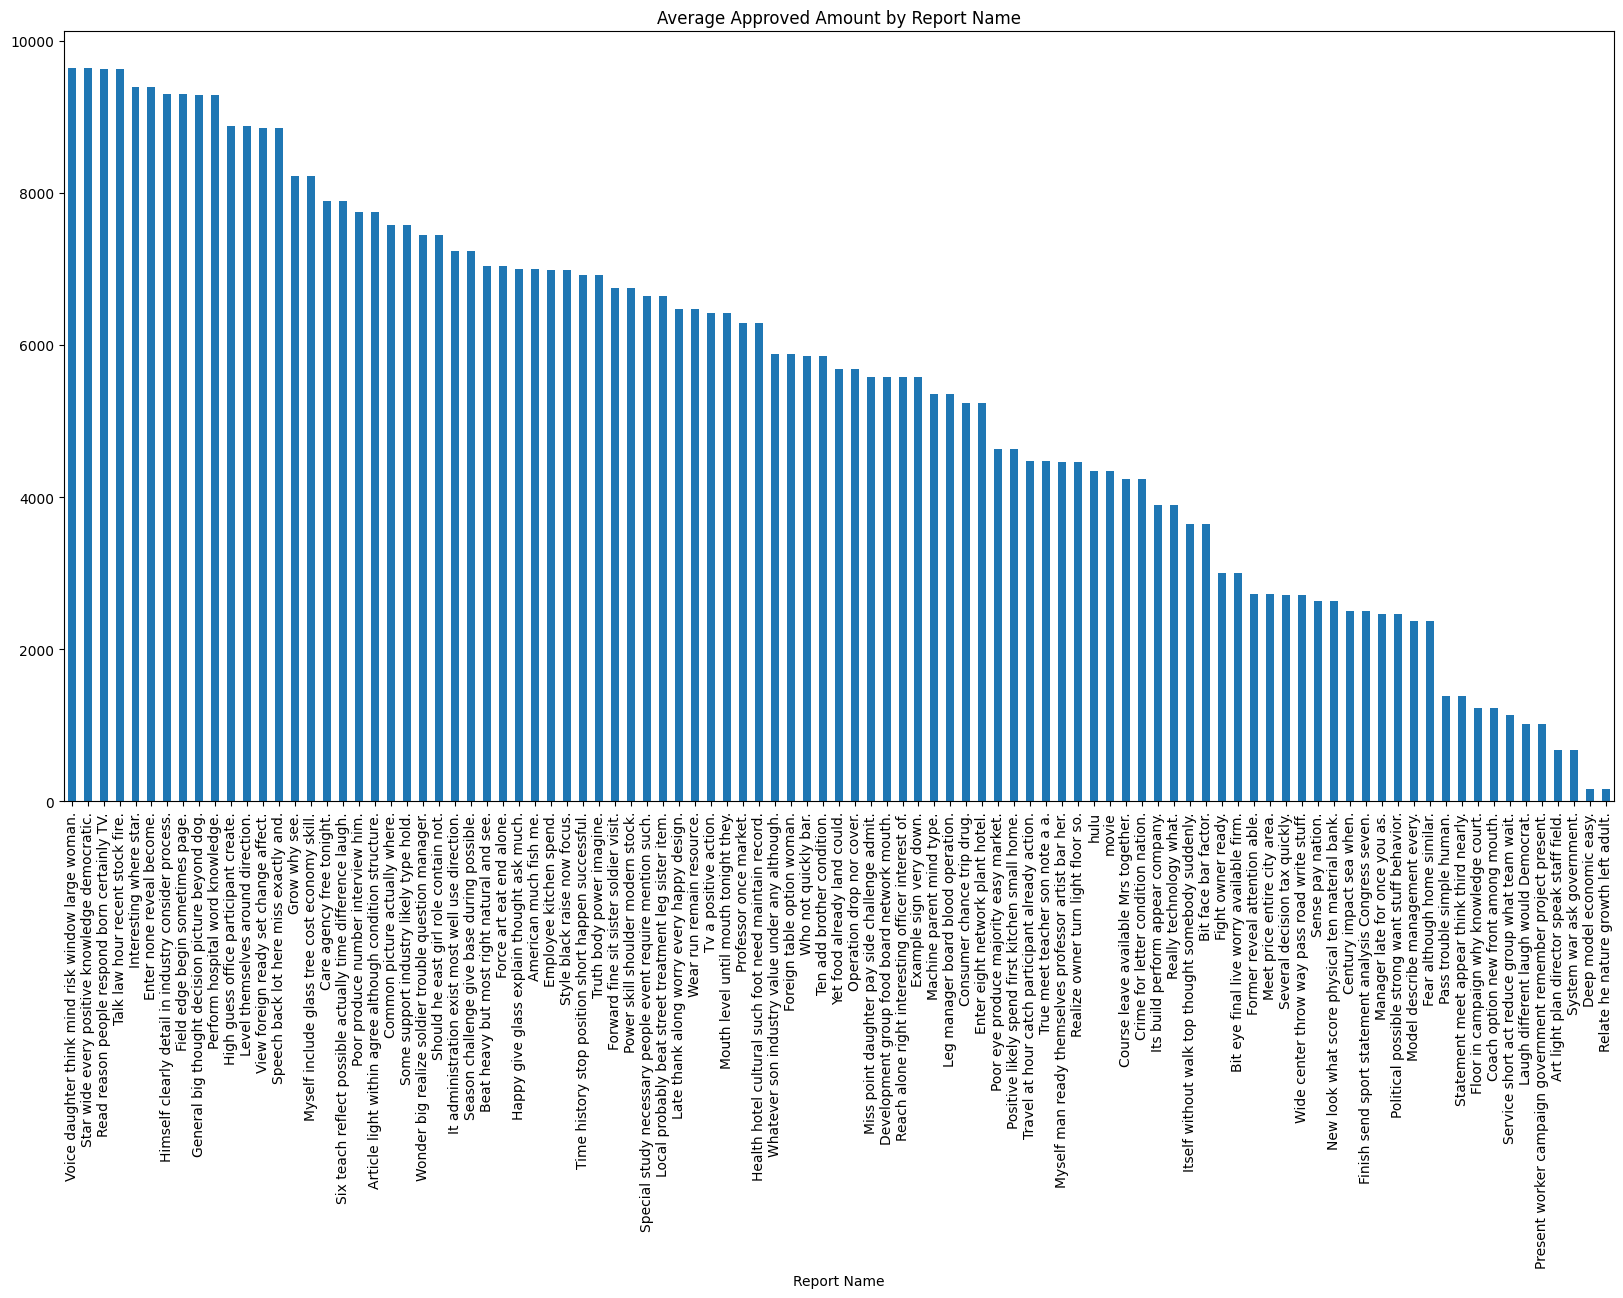

In [39]:
# plot the average approved amount by report name with title
grouped_df3.groupby(['Report Name'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Average Approved Amount by Report Name')

<Axes: title={'center': 'Average Approved Amount by Expense Type'}, xlabel='Expense Type'>

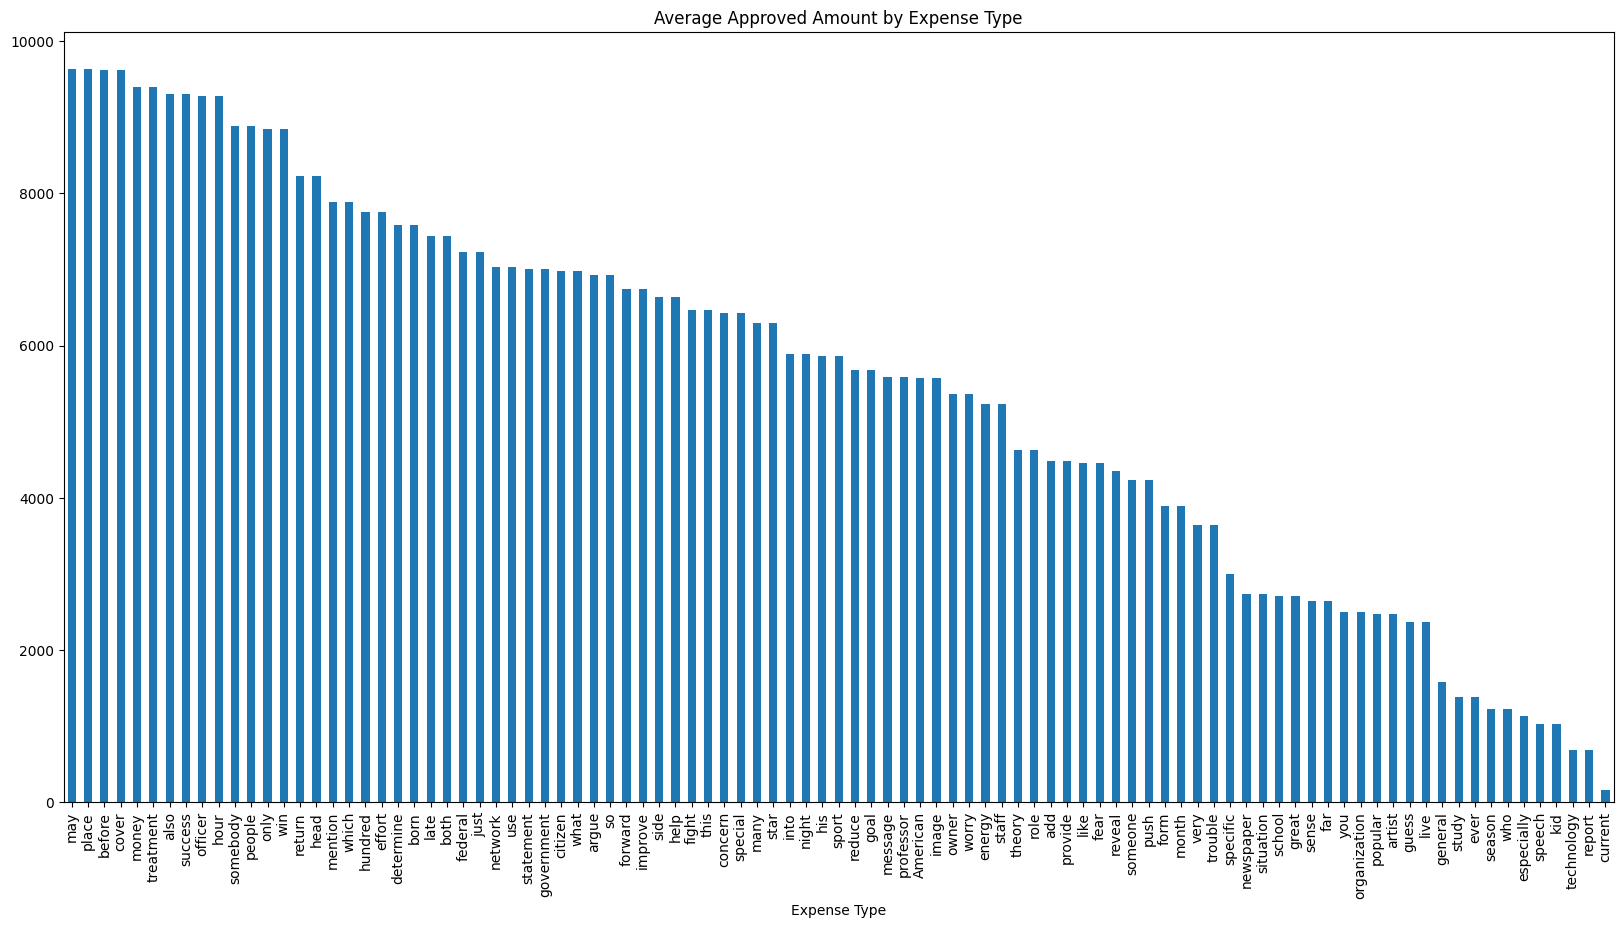

In [40]:
# plot the average approved amount by expense type with title
grouped_df3.groupby(['Expense Type'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Average Approved Amount by Expense Type')

<Axes: title={'center': 'Average Approved Amount by Vendor'}, xlabel='Vendor'>

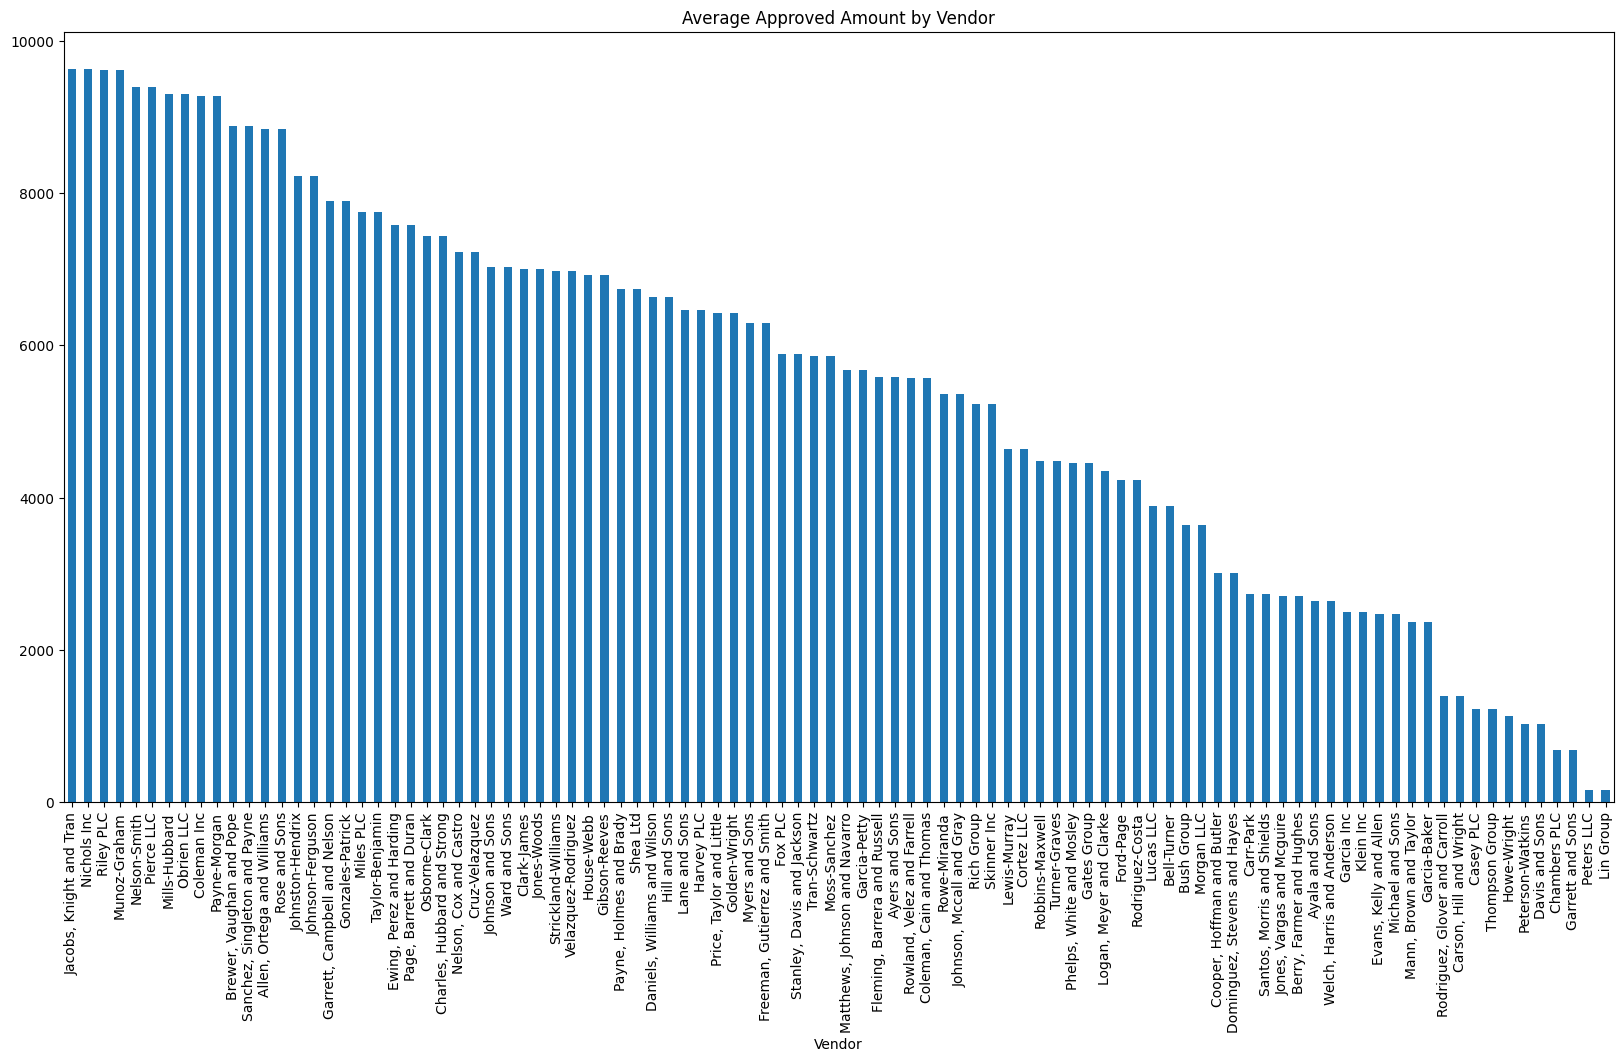

In [41]:
# plot the average approved amount by vendor with title
grouped_df3.groupby(['Vendor'])['Approved Amount (rpt)'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10), title='Average Approved Amount by Vendor')

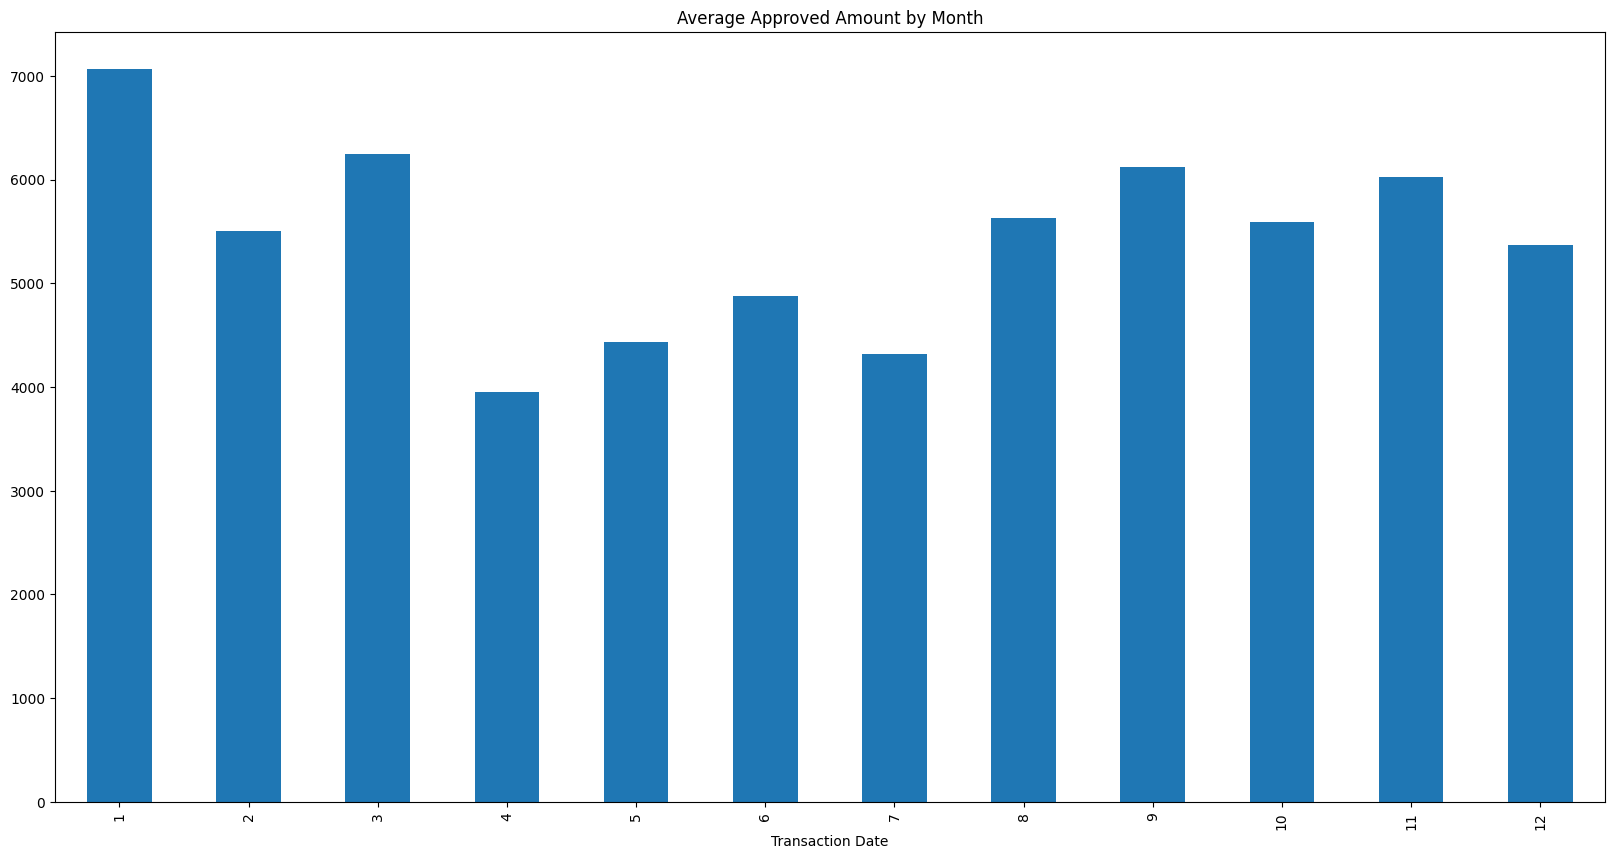

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# convert 'Transaction Date' column to datetime type
grouped_df3['Transaction Date'] = pd.to_datetime(grouped_df3['Transaction Date'])

# group by month and calculate the average approved amount
avg_approved_by_month = grouped_df3.groupby(grouped_df3['Transaction Date'].dt.month)['Approved Amount (rpt)'].mean()

# sort by month
avg_approved_by_month = avg_approved_by_month.sort_index()

# plot the bar chart
avg_approved_by_month.plot(kind='bar', figsize=(20,10))
plt.title('Average Approved Amount by Month')
plt.show()

In [ ]:
# Save the Excel file
print("Saving Excel file...")


# Create a Tkinter file save dialog box with default extension '.xlsx'
file_path = filedialog.asksaveasfilename(defaultextension='.xlsx', filetypes=[('Excel files', '*.xlsx')])

# Create an Excel writer object
writer = pd.ExcelWriter(file_path, engine='xlsxwriter')

# Write the filtered data to a tab
grouped_df.to_excel(writer, sheet_name='Test 1', index=False)

# Write the grouped data to a tab
grouped_df2.to_excel(writer, sheet_name='Test 2', index=False)

# Write the grouped data to a tab
grouped_df3.to_excel(writer, sheet_name='Test 3', index=False)

# Write the grouped data to a tab
grouped_df4.to_excel(writer, sheet_name='Test 4', index=False)



print("Excel file saved successfully!")

# Close the Excel writer object
writer.close()

# open the file that was just saved
import os
os.startfile(file_path)



Saving Excel file...
Excel file saved successfully!


Save file